In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")
sub_data = pd.read_csv('dataset/sample_submission.csv')
train_data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


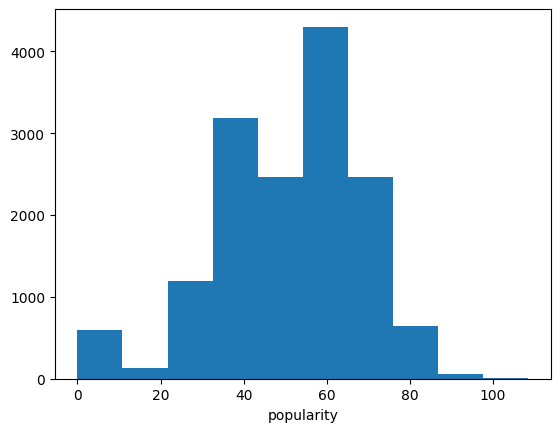

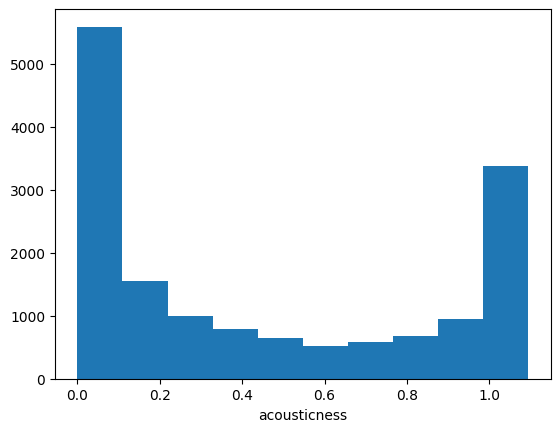

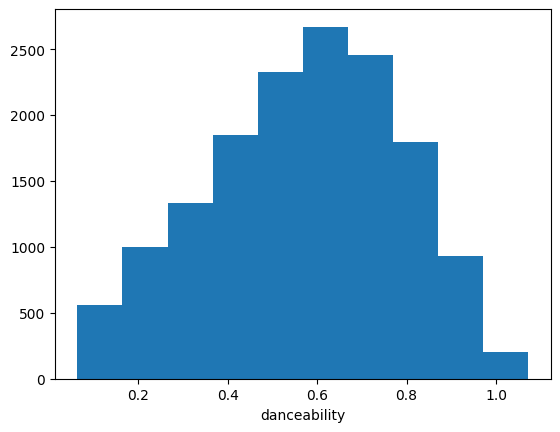

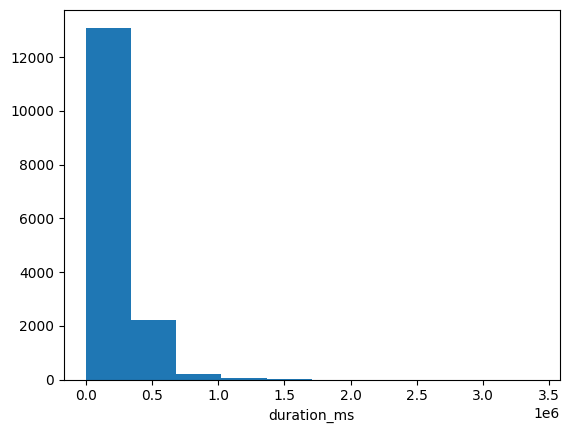

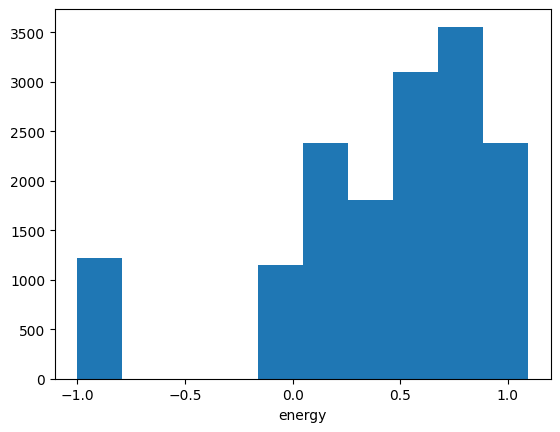

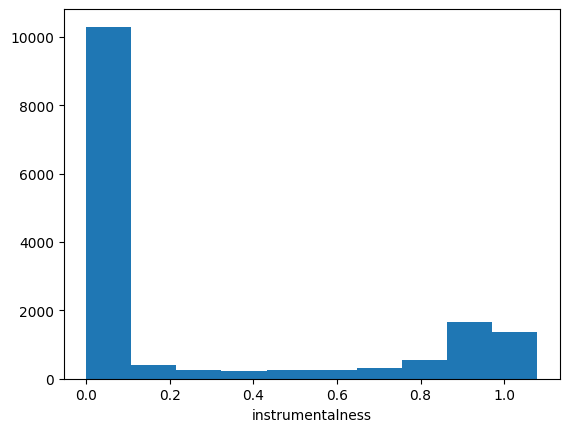

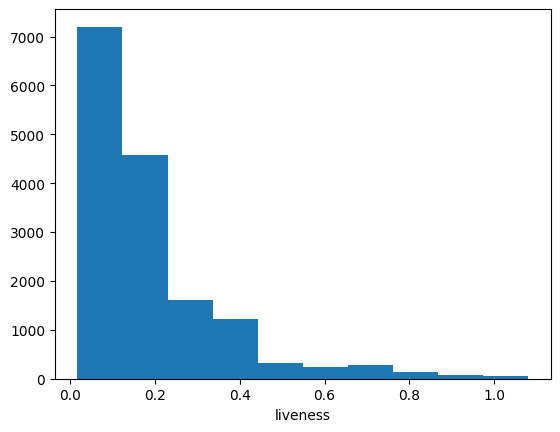

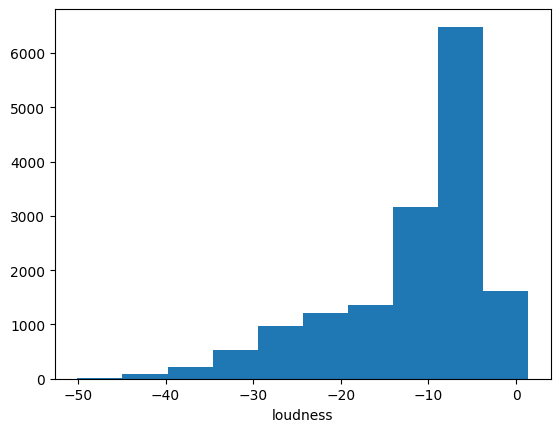

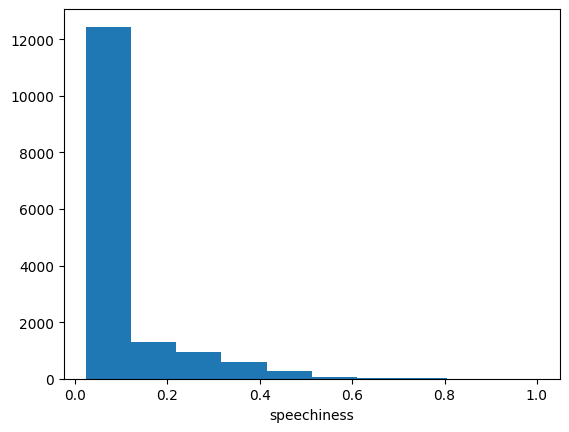

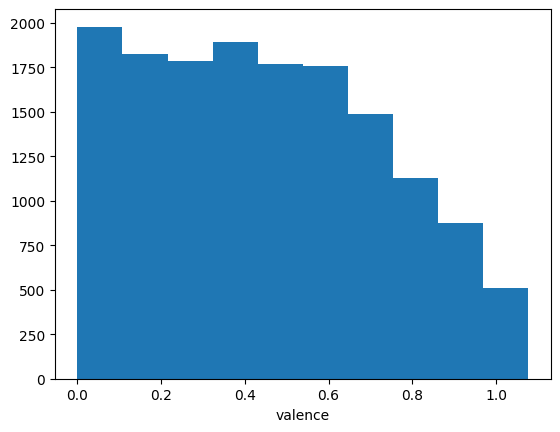

In [393]:
for i in train_data.describe().columns:
    plt.hist(train_data[i])
    plt.xlabel(i)
    plt.show()

In [394]:
continous_columns = train_data.describe().columns

In [395]:
train_data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [396]:
q1 = train_data['liveness'].quantile(0.99)
train_data = train_data[train_data['liveness']<q1]

q2 = train_data['duration_ms'].quantile(0.99)
train_data = train_data[train_data['duration_ms']<q2]

q3 = train_data['loudness'].quantile(0.01)
train_data = train_data[train_data['loudness']>q3]

q4 = train_data['speechiness'].quantile(0.99)
train_data = train_data[train_data['speechiness']<q4]

train_data.reset_index(inplace=True, drop=True)

In [397]:
train_data.isna().sum()

instance_id             0
track_name              0
popularity            604
acousticness            0
danceability          524
duration_ms             0
energy                 90
instrumentalness       87
key                     0
liveness                0
loudness                0
voice_gender          721
mode                   34
speechiness             0
tempo                   0
musician_category    1295
valence               651
music_genre             0
dtype: int64

In [398]:
train_data['music_genre'].value_counts()

Rock          3806
Classical     3625
Rap           3027
Jazz          2763
Country        664
Electronic     593
Hip-Hop        437
Name: music_genre, dtype: int64

In [399]:
#train_data.dropna(inplace=True)
#train_data.reset_index(inplace=True, drop=True)

#### Coverting encoding Categorical data 

In [400]:
from sklearn.preprocessing import LabelEncoder

In [401]:
le1 = LabelEncoder()
le1.fit(train_data.key)
train_data['key'] = le1.transform(train_data['key'])

le2 = LabelEncoder()
le2.fit(train_data.voice_gender)
train_data['voice_gender'] = le2.transform(train_data['voice_gender'])

le3 = LabelEncoder()
le3.fit(train_data['mode'])
train_data['mode'] = le3.transform(train_data['mode'])

le4 = LabelEncoder()
le4.fit(train_data['musician_category'])
train_data['musician_category'] = le4.transform(train_data['musician_category'])

le5 = LabelEncoder()
le5.fit(train_data['music_genre'])
train_data['music_genre'] = le5.transform(train_data['music_genre'])

train_data.drop(columns=['instance_id', 'track_name'], inplace=True)

In [402]:
def encoding(data):
    
    
    data['key'] = le1.transform(data['key'])
    data['voice_gender'] = le2.transform(data['voice_gender'])
    data['mode'] = le3.transform(data['mode'])
    data['musician_category'] = le4.transform(data['musician_category'])   
    data.drop(columns=['instance_id', 'track_name'], inplace=True)
    
    return data
        

In [403]:
train_data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence',
       'music_genre'],
      dtype='object')

#### Dealing with the missing value in tempo feature

In [404]:
from sklearn.impute import KNNImputer

In [405]:
for i in range(len(train_data)):
    if train_data['tempo'][i] == '?':
        train_data['tempo'][i] = np.nan
imp = KNNImputer(n_neighbors=2, weights="uniform")
train_data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence']] = imp.fit_transform(train_data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence']])

<ipython-input-405-fe787d7b8828>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tempo'][i] = np.nan


In [406]:
def Impute_test(data):
    for i in range(len(data)):
        if data['tempo'][i] == '?':
            data['tempo'][i] = np.nan
            
    data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence']] = imp.transform(data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence']])
    
    return data

In [407]:
train_data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7.0,0.147134,-14.140,3.0,1.0,0.046404,143.7880,0.0,0.598965,4
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0.0,0.174655,-13.716,2.0,0.0,0.039949,139.7970,0.0,0.357194,4
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5.0,0.042030,-4.995,1.0,1.0,0.119917,105.0180,0.0,0.635525,5
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5.0,0.124637,-4.262,0.0,1.0,0.167493,128.2865,1.0,0.983750,6
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9.0,0.134782,-26.922,1.0,2.0,0.039139,112.1830,0.0,0.074412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,2.0,0.248399,-16.331,1.0,1.0,0.045251,123.5160,0.0,0.624518,0
14911,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,8.0,0.681492,-25.087,0.0,1.0,0.448377,129.4450,1.0,0.609022,4
14912,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,6.0,0.416611,-10.246,1.0,1.0,0.040625,123.1700,3.0,0.869294,4
14913,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,8.0,0.166336,-7.257,0.0,2.0,0.060308,116.0770,1.0,0.402700,6


#### Spliting data into train and test

In [408]:
x_train = train_data.drop(columns=['music_genre'])
y_train = train_data['music_genre']

#### Scaling the data

In [409]:
from sklearn.preprocessing import StandardScaler

In [410]:
scaler = StandardScaler()
x_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo', 'musician_category', 'valence']] = scaler.fit_transform(x_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo', 'musician_category', 'valence']])  

In [411]:
def scale(data):
    data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo', 'musician_category', 'valence']] = scaler.transform(data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo', 'musician_category', 'valence']])
    return data

In [412]:
x_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,-0.114403,1.287423,0.024336,-0.195249,-0.471011,-0.657941,0.480791,-0.280762,-0.350693,2.105767,-0.475399,-0.486022,0.949694,-1.209373,0.512471
1,0.499555,1.381193,0.530609,-0.182799,-0.327185,-0.657863,-1.556755,-0.086883,-0.298840,0.996470,-2.183146,-0.555192,0.814930,-1.209373,-0.370559
2,2.182825,-1.006253,1.856940,0.259597,0.824961,-0.657941,-0.101365,-1.021215,0.767686,-0.112826,-0.475399,0.301753,-0.359450,-1.209373,0.646002
3,0.265191,-1.029799,0.193574,-0.392382,1.045277,-0.657380,-0.101365,-0.439252,0.857328,-1.222123,-0.475399,0.811589,0.426256,-0.174383,1.917837
4,-0.349805,1.017743,-1.394021,1.319986,-0.621734,-0.650910,1.062947,-0.367782,-1.913856,-0.112826,1.232349,-0.563868,-0.117510,-1.209373,-1.403374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,-2.949718,1.037577,-0.888709,-1.858632,-0.461872,-0.584589,-0.974599,0.432636,-0.618639,-0.112826,-0.475399,-0.498370,0.265171,-1.209373,0.605799
14911,-0.613919,1.077021,-0.546062,1.071916,-0.164880,-0.656615,0.771869,3.483742,-1.689446,-1.222123,-0.475399,3.821563,0.465375,-0.174383,0.549202
14912,-0.927096,1.129984,-0.041360,2.650387,0.213818,-0.123626,0.189713,1.617679,0.125520,-0.112826,-0.475399,-0.547949,0.253487,1.895596,1.499806
14913,0.491830,-0.780944,0.327275,-0.686600,0.931689,-0.657714,0.771869,-0.145488,0.491057,-1.222123,1.232349,-0.337021,0.013979,-0.174383,-0.204355


#### Balancing data

In [413]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek

In [414]:
y_train.value_counts()

6    3806
0    3625
5    3027
4    2763
1     664
2     593
3     437
Name: music_genre, dtype: int64

In [415]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

#undersample = NearMiss()
#x_train, y_train = undersample.fit_resample(x_train, y_train)

In [416]:
y_train.value_counts()

4    3806
5    3806
6    3806
0    3806
2    3806
1    3806
3    3806
Name: music_genre, dtype: int64

#### Model building and feature selection

In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score 
from sklearn.model_selection import cross_validate

In [418]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train, y_train)
result = cross_validate(rfc, x_train, y_train, scoring="f1_macro")
print(result['test_score'].mean())

0.8634561405688789


In [419]:
from sklearn.feature_selection import RFE

In [420]:
estimator = RandomForestClassifier(n_estimators=150)

selector = RFE(estimator, n_features_to_select=11, step=1)
selector = selector.fit(x_train, y_train)
columns = []
for i in range(len(selector.ranking_)):
    if(selector.ranking_[i]!=1):
        columns.append(x_train.columns[i])
    print(x_train.columns[i],':  ',selector.ranking_[i])

popularity :   1
acousticness :   1
danceability :   1
duration_ms :   1
energy :   1
instrumentalness :   1
key :   2
liveness :   1
loudness :   1
voice_gender :   3
mode :   4
speechiness :   1
tempo :   1
musician_category :   5
valence :   1


In [421]:
X1 = x_train.drop(columns=columns)

In [422]:
final_model = RandomForestClassifier(n_estimators=150)
final_model.fit(X1, y_train)
result = cross_validate(final_model, X1, y_train, scoring="f1_macro")
print(result['test_score'].mean())

0.8371180140861421


In [423]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
result = cross_validate(lr, x_train, y_train, scoring="f1_macro")
print(result['test_score'].mean())

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.6344076376091831


#### Processing Test data

In [424]:
submission_data = test_data[['instance_id']]

In [425]:
test_data = encoding(test_data)
test_data = Impute_test(test_data)
test_data = scale(test_data)

<ipython-input-406-73bb1993e824>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][i] = np.nan


In [426]:
X_test = test_data.drop(columns=columns)

In [427]:
pred_test = rfc.predict(test_data)

In [428]:
submission_data['music_genre'] = 0

<ipython-input-428-b560e365ba7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['music_genre'] = 0


In [429]:
submission_data['music_genre'] = pred_test

<ipython-input-429-d15379debae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['music_genre'] = pred_test


In [430]:
submission_data['music_genre'] = le5.inverse_transform(submission_data['music_genre'])

<ipython-input-430-b5bb157e1861>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['music_genre'] = le5.inverse_transform(submission_data['music_genre'])


In [431]:
submission_data

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Electronic
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Country
